In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 447us/step - loss: 0.3557 - val_loss: 0.2708
Epoch 2/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2636 - val_loss: 0.2523
Epoch 3/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2415 - val_loss: 0.2288
Epoch 4/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2215 - val_loss: 0.2117
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2071 - val_loss: 0.1998
Epoch 6/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1967 - val_loss: 0.1910
Epoch 7/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1888 - val_loss: 0.1839
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1821 - val_loss: 0.1777
Epoch 9/50
60000/60000 [==============================] - 2s

In [9]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

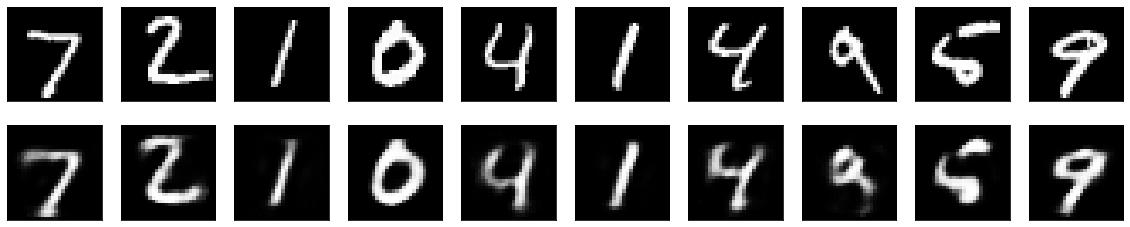

In [11]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## With regularization added

In [16]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [17]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [19]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.4951 - val_loss: 0.4851
Epoch 2/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.4759 - val_loss: 0.4671
Epoch 3/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.4590 - val_loss: 0.4512
Epoch 4/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4440 - val_loss: 0.4372
Epoch 5/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4308 - val_loss: 0.4248
Epoch 6/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.4191 - val_loss: 0.4137
Epoch 7/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4086 - val_loss: 0.4038
Epoch 8/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.3992 - val_loss: 0.3949
Epoch 9/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.3907 - val_loss: 0.3

Epoch 77/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2811 - val_loss: 0.2810
Epoch 78/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.2809 - val_loss: 0.2807
Epoch 79/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.2806 - val_loss: 0.2805
Epoch 80/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.2804 - val_loss: 0.2802
Epoch 81/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2801 - val_loss: 0.2800
Epoch 82/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.2799 - val_loss: 0.2797
Epoch 83/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2796 - val_loss: 0.2795
Epoch 84/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.2794 - val_loss: 0.2793
Epoch 85/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.2792 - val_loss: 0.2791
Epoch 86/100
60000/60000 [===========